# **Derivation of the threshold function**

![image.png](f_smooth.png)

In [1]:
# import dill
# dill.settings['recurse'] = True

In [2]:
%matplotlib widget
import sympy as sp
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as ipw
sp.init_printing()
from cymbol import Cymbol, ccode

# Variables

**Stress variables**

$x$ corresponds to $\sigma_N$ and $y$ corresponds to $\sigma_T$

In [3]:
x, y = sp.symbols('x, y')

**Unknown parameters of the ellipse cap function**

In [4]:
x_c = sp.symbols('x_c')  # center point of an ellipse
a = sp.symbols('a', nonnegative=True)
b = sp.symbols('b', nonnegative=True)
c = sp.symbols('c', positive=True)

**Material parameters**

In [5]:
x_0 = sp.symbols('x_0')
x_bar, y_bar = sp.symbols(r'\bar{x}, \bar{y}', nonnegative=True )
m = Cymbol(r'm', codename='m_', real=True, nonnegative=True)

# Mid part of the threshold function

The linear part of the thresshold function is introduced as
\begin{align}
f_\mathrm{lin} :=
|y| - \bar{y} + m(x - x_0)
\end{align}
where $x_0$ denotes the reference position at which $y = \pm \bar{y}$

In [6]:
f_mid_ = sp.sqrt(y**2) - (y_bar - m * (x-x_0))
#get_f_mid = sp.lambdify((x, y, y_bar, m), f_mid_)
f_mid_

# Cap function

It is introduced in form of an ellipse centered at the position ($x_c, 0$), i.e.
\begin{align}
f_\mathrm{ell} := \sqrt{\dfrac{y^2}{b^2} + \dfrac{(x - x_0 - x_\mathrm{c})^2}{a^2}} - c
\end{align}
The parameters $a, b, c$ and $x_\mathrm{c}$ are determined based on the compatibility and continuity conditions along the transition between $f_\mathrm{lin}$ and $f_\mathrm{ell}$.

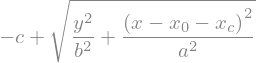

In [7]:
f_cap_ = sp.sqrt((x-x_0-x_c)**2/a**2 + y**2/b**2) - c
f_cap_

Construct the derivatives

In [8]:
df_cap_dx_ = f_cap_.diff(x)
df_cap_dy_ = f_cap_.diff(y)

# Compatibility and smoothness conditions specified in the figure above

\begin{align}
\left. f_\mathrm{ell} \right|_{x = \bar{x}, y = 0} &= 0 \\
\left. f_\mathrm{ell} \right|_{x=x_0, y=\bar{y}} &= 0 \\
\left.
\dfrac{f_{\mathrm{ell},x}}{f_{\mathrm{ell},y}
}
\right|_{x=x_\mathrm{c}, y=\bar{y}}
&= -m
\end{align}

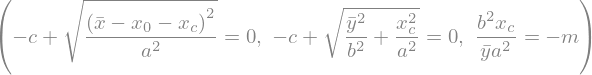

In [9]:
eq1 = sp.Eq(f_cap_.subs({x: x_bar, y: 0}), 0)
eq2 = sp.Eq(f_cap_.subs({x: x_0, y: y_bar}), 0)
eq3 = sp.Eq((-df_cap_dx_ / df_cap_dy_).subs({x: x_0, y: y_bar}), -m)
eq1, eq2, eq3

Solve for $a, b$ and $x_c$

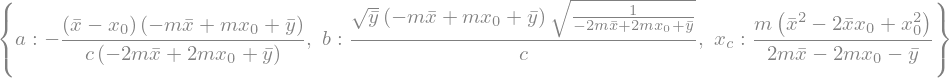

In [10]:
abx_subs = sp.solve({eq1, eq2, eq3},{a, b, x_c})[0]
abx_subs

# Continuity between $f_\mathrm{mid}$ and $f_\mathrm{cap}$


**Require an identical value for**
\begin{align}
f_\mathrm{mid}(x_c, 0) = f_\mathrm{cap}(x_c,0)
\end{align}

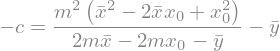

In [11]:
f_mid_c_ = f_mid_.subs({x: abx_subs[x_c]+x_0,y:0})
f_cap_abx_ = f_cap_.subs(abx_subs)
f_cap_abxc_ = f_cap_abx_.subs({x: abx_subs[x_c]+x_0,y:0})
eq4 = sp.Eq(f_cap_abxc_, f_mid_c_)
eq4

Which can be used to express $c$

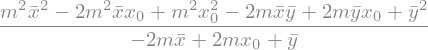

In [12]:
c_solved = sp.solve(eq4, c)[0]
sp.simplify(c_solved)

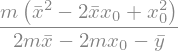

In [13]:
abx_subs[x_c]

In [14]:
x_hat = sp.symbols(r'\hat{x}', nonnegative=True)

In [15]:
c_paper = y_bar + (m**2 * (x_hat) **2)/(2*m*(x_hat) + y_bar)
sp.simplify(c_paper.subs(x_hat, x_0 - x_bar) - c_solved)

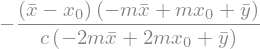

In [16]:
a_solved = abx_subs[a]
sp.simplify(a_solved)

In [17]:
x_hat_ = (x_bar - x_0)

$$
-\frac{\bar{y} - m \hat{x} } {\bar{y} - 2m\hat{x}} \cdot \frac{\hat{x}}{c}
$$

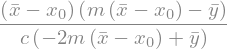

In [18]:
a_paper = - (-m*x_hat_ + y_bar)/((-2*m*x_hat_ + y_bar)) * x_hat_ / c
a_paper

In [19]:
sp.simplify(a_paper - a_solved)

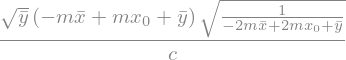

In [20]:
b_solved = abx_subs[b]
sp.simplify(b_solved)

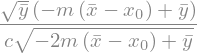

In [21]:
b_paper = (sp.sqrt(y_bar)/c * 
           (-m * x_hat_ + y_bar)/(sp.sqrt((-2*m*x_hat_ + y_bar))))
b_paper

$$
\frac{\bar{y} - m \hat{x}}{\sqrt{\bar{y} - 2m \hat{x}}} \cdot
\frac{\sqrt{y}}{c}
$$

In [22]:
sp.simplify(b_paper**2 - b_solved**2)

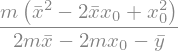

In [23]:
x_c_solved = abx_subs[x_c]
sp.simplify(x_c_solved)

In [24]:
x_c_paper = -(m*x_hat**2)/(2*m*x_hat + y_bar)
sp.simplify(x_c_paper.subs(x_hat, x_0 - x_bar) - x_c_solved)

Substitute back the $f_\mathrm{cap}$ to obtain its resolved form

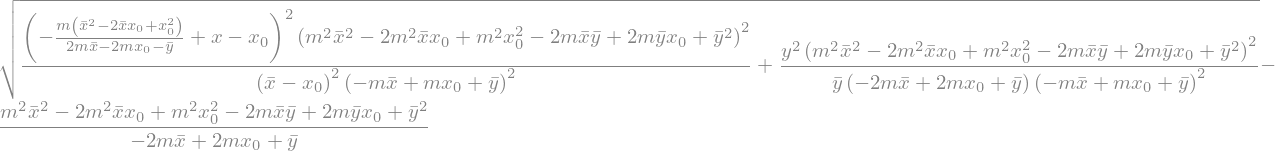

In [25]:
f_cap_solved_1 = f_cap_abx_.subs(c, c_solved)
f_cap_solved_1

In [26]:
f_cap_solved_ = f_cap_solved_1 # dill.loads(dill.dumps(f_cap_solved_1))

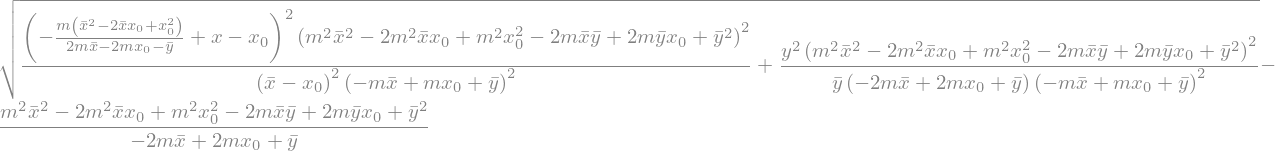

In [27]:
f_cap_solved_

In [28]:
x_bar, y_bar = sp.symbols(r'\bar{x}, \bar{y}', nonnegative=True )


# Test the results

In [29]:
_x_0=-3
_x_bar=-5
_y_bar=3
_m=.3

The value in the denominator must not be equal to 0

In [30]:
m_limit_ = sp.solve(2*x_bar * m + y_bar, m)[0]
_m_limit = m_limit_.subs({x_bar: _x_bar, y_bar: _y_bar})
_m_limit

In [31]:
if _m < _m_limit * sp.sign(_x_bar - _x_0):
    print('Take care')

Test the obtained position of $x_c$

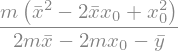

In [32]:
x_c_ = abx_subs[x_c]
x_c_

In [33]:
get_x_c = sp.lambdify((x_bar, y_bar, m, x_0), x_c_, 'numpy' )
_x_c = get_x_c(_x_bar, _y_bar, _m, _x_0)
_x_c

# Domain separation for $f_\mathrm{cap}$ and $f_\mathrm{mid}$

Define the transition between cap and mid domains by defining a connection 
line between [$x_c$,0]-[0,$\bar{\tau}$]. 

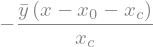

In [34]:
(-y_bar / (x_c) * (x - x_0 -x_c))

In [35]:
y_trans_ = (-y_bar / (x_c) * (x - x_0 - x_c)).subs(x_c, x_c_)
f_cap_domain_ = sp.sign(x_bar-x_0) * sp.sign(-m) * (sp.Abs(y) - y_trans_) > 0

In [36]:
x_trans = np.linspace(_x_c, _x_0, 10)
get_y_trans = sp.lambdify((x, x_bar, y_bar, m, x_0), y_trans_)
y_trans = get_y_trans(x_trans, _x_bar, _y_bar, _m, _x_0)
x_trans, y_trans

(array([-0.28571429, -0.58730159, -0.88888889, -1.19047619, -1.49206349,
        -1.79365079, -2.0952381 , -2.3968254 , -2.6984127 , -3.        ]),
 array([31.5       , 28.33333333, 25.16666667, 22.        , 18.83333333,
        15.66666667, 12.5       ,  9.33333333,  6.16666667,  3.        ]))

In [37]:
get_y_trans(_x_c, _x_bar, _y_bar, _m, _x_0)

# Composed smooth level set function $f_\mathrm{full}(x,y)$

In [38]:
f_full_ = sp.Piecewise(
    (f_cap_solved_, f_cap_domain_),
    (f_mid_, True)
)
get_f_full_lambdified = sp.lambdify((x, y, x_bar, y_bar, m, x_0), f_full_, 'numpy')

# Composed level set function with two caps

In [39]:
f_t = Cymbol(r'f_\mathrm{t}', codename='f_t_')
f_c = Cymbol(r'f_\mathrm{c}', codename='f_c_')
f_c0 = Cymbol(r'f_\mathrm{c0}', codename='f_c0_')
f_s = Cymbol(r'f_\mathrm{s}', codename='f_s_')

In [40]:
subs_tension = {x_0: 0, x_bar: f_t, y_bar: f_s}
subs_shear = {y_bar: f_s, x_0: 0}
subs_compression = {x_0: -f_c0, x_bar: -f_c,  y_bar: f_s-m*(-f_c0) }

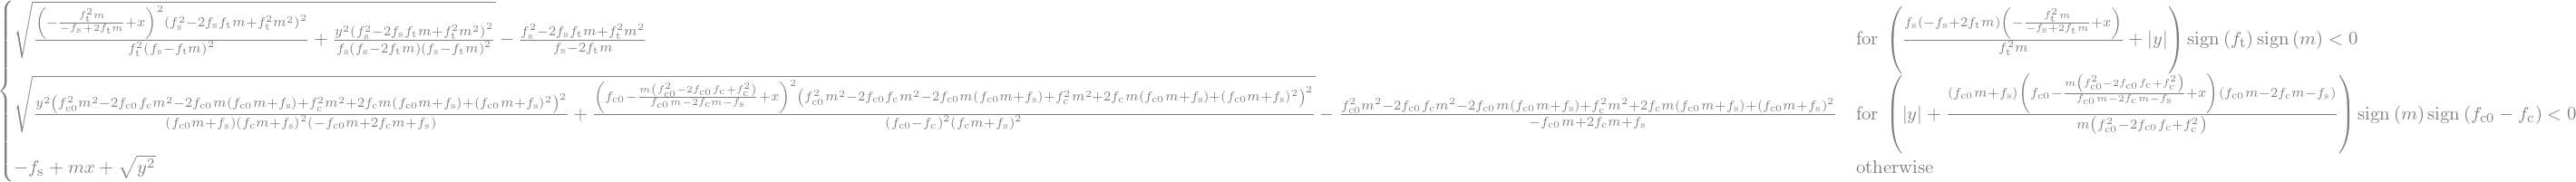

In [41]:
f_solved_ = sp.Piecewise(
    (f_cap_solved_.subs(subs_tension), f_cap_domain_.subs(subs_tension)),
    (f_cap_solved_.subs(subs_compression), f_cap_domain_.subs(subs_compression)),
    (f_mid_.subs(subs_shear), True)
)
f_solved_

In [42]:
get_f_solved_lambdified = sp.lambdify((x, y, f_t, f_c, f_c0, f_s, m), f_solved_, 'numpy')
get_f_solved = get_f_solved_lambdified # dill.loads(dill.dumps(get_f_solved_lambdified))

In [43]:
# f_file = open('f.dill', 'wb')
# dill.dump(get_f_solved_lambdified, f_file)
# f_file.close()

In [44]:
# f_file = open('f.dill', 'rb')
# get_f_solved = dill.load(f_file)
# f_file.close()

In [45]:
X_a, Y_a = np.mgrid[-100:20:210j,-30:30:210j]
mp = {'f_t_': 5, 'f_c_': 80, 'f_c0_': 70, 'f_s_': 5, 'm_': 0.1}
Z_a = get_f_solved(X_a,Y_a,**mp)

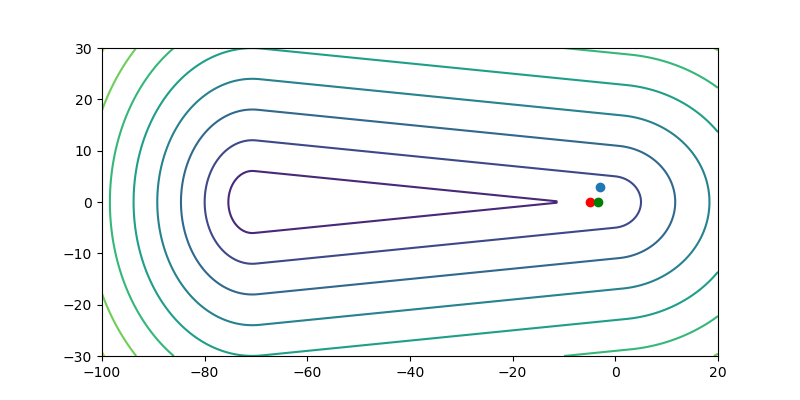

In [46]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
ax.contour(X_a,Y_a,Z_a, levels=8)
ax.plot([_x_0], [_y_bar], marker='o')
ax.plot([_x_bar], [0], marker='o', color='red')
ax.plot([_x_c+_x_0], [0], marker='o', color='green')
ax.set_aspect('equal')